In [1]:
import pandas as pd
import numpy as np

In [2]:
df_tract = pd.read_csv('data/ot_tractability_pipeline_2011_release.tsv', sep='\t', low_memory=False)

In [3]:
df_tract.head(5)

,ensembl_gene_id,symbol,accession,Bucket_1_sm,Bucket_2_sm,Bucket_3_sm,Bucket_4_sm,Bucket_5_sm,Bucket_6_sm,Bucket_7_sm,...,Bucket_3_othercl,Bucket_sum_othercl,Top_bucket_othercl,drug_chembl_ids_othercl,drug_names_othercl,clinical_phases_othercl,Clinical_Precedence_othercl,Category_othercl,drug_names_dict_othercl,clinical_phases_dict_othercl
0,ENSG00000146648,EGFR,P00533,1,0,0,1,1,1,0,...,0,0,10,[''],[''],NaN,0.0,Unknown,{'': ''},{'': ''}
1,ENSG00000128052,KDR,P35968,1,0,0,1,1,1,0,...,0,1,2,['CHEMBL2108557'],['TELBERMIN'],2,0.7,Clinical_Precedence_othercl,{'CHEMBL2108557': 'TELBERMIN'},{'CHEMBL2108557': '2'}
2,ENSG00000141736,ERBB2,P04626,1,0,0,1,1,1,0,...,0,0,10,[''],[''],NaN,0.0,Unknown,{'': ''},{'': ''}
3,ENSG00000005844,ITGAL,P20701,1,0,0,1,1,1,0,...,0,0,10,[''],[''],NaN,0.0,Unknown,{'': ''},{'': ''}
4,ENSG00000197635,DPP4,P27487,1,0,0,1,1,1,0,...,0,0,10,[''],[''],NaN,0.0,Unknown,{'': ''},{'': ''}


In [4]:
cols = [
    'ensembl_gene_id',
    'symbol',
    'accession',
    'Clinical_Precedence_sm',
    'drug_chembl_ids_sm',
    'Clinical_Precedence_ab',
    'drug_chembl_ids_ab',
    'Clinical_Precedence_othercl',
    'drug_chembl_ids_othercl',
    'Clinical_Precedence_PROTAC',
]

In [5]:
df2 = df_tract[cols].copy()
df2.head(5)

,ensembl_gene_id,symbol,accession,Clinical_Precedence_sm,drug_chembl_ids_sm,Clinical_Precedence_ab,drug_chembl_ids_ab,Clinical_Precedence_othercl,drug_chembl_ids_othercl,Clinical_Precedence_PROTAC
0,ENSG00000146648,EGFR,P00533,1.0,"['CHEMBL1079742', 'CHEMBL1201179', 'CHEMBL1614...",1.0,"['CHEMBL1201577', 'CHEMBL1201827', 'CHEMBL1743...",0.0,[''],0.0
1,ENSG00000128052,KDR,P35968,1.0,"['CHEMBL101253', 'CHEMBL1200485', 'CHEMBL12017...",1.0,"['CHEMBL1742983', 'CHEMBL1743062', 'CHEMBL2109...",0.7,['CHEMBL2108557'],0.0
2,ENSG00000141736,ERBB2,P04626,1.0,"['CHEMBL1201179', 'CHEMBL1614707', 'CHEMBL1614...",1.0,"['CHEMBL1201585', 'CHEMBL1743082', 'CHEMBL2007...",0.0,[''],0.0
3,ENSG00000005844,ITGAL,P20701,1.0,['CHEMBL2048028'],1.0,"['CHEMBL1201575', 'CHEMBL2109177', 'CHEMBL2109...",0.0,[''],0.0
4,ENSG00000197635,DPP4,P27487,1.0,"['CHEMBL1201174', 'CHEMBL1201743', 'CHEMBL1427...",0.7,['CHEMBL3833357'],0.0,[''],0.0


In [6]:
# df2['ot_tractability_sm'] = df2['Clinical_Precedence_sm'].loc[df2['Clinical_Precedence_sm'] != 0] = True 
# df2.head(5)

# df2.loc[df2['Clinical_Precedence_sm'] != 0, 'ot_tractability_sm'] = True
# df2.loc[df2['Clinical_Precedence_ab'] != 0, 'ot_tractability_ab'] = True
# df2.loc[df2['Clinical_Precedence_othercl'] != 0, 'ot_tractability_other'] = True

# df2['ot_tractability_sm'] = df2['Clinical_Precedence_sm'].loc[df2['Clinical_Precedence_sm'] != 0] = True
# df2.head(5)

df2['ot_is_small_molecule_in_clinic'] = df2['Clinical_Precedence_sm'].apply(lambda x: True if x > 0 else False)
df2['ot_is_small_antibody_in_clinic'] = df2['Clinical_Precedence_ab'].apply(lambda x: True if x > 0 else False)
df2['ot_is_other_in_clinic'] = df2['Clinical_Precedence_othercl'].apply(lambda x: True if x > 0 else False)
    
    
df2.head(5)

,ensembl_gene_id,symbol,accession,Clinical_Precedence_sm,drug_chembl_ids_sm,Clinical_Precedence_ab,drug_chembl_ids_ab,Clinical_Precedence_othercl,drug_chembl_ids_othercl,Clinical_Precedence_PROTAC,ot_is_small_molecule_in_clinic,ot_is_small_antibody_in_clinic,ot_is_other_in_clinic
0,ENSG00000146648,EGFR,P00533,1.0,"['CHEMBL1079742', 'CHEMBL1201179', 'CHEMBL1614...",1.0,"['CHEMBL1201577', 'CHEMBL1201827', 'CHEMBL1743...",0.0,[''],0.0,True,True,False
1,ENSG00000128052,KDR,P35968,1.0,"['CHEMBL101253', 'CHEMBL1200485', 'CHEMBL12017...",1.0,"['CHEMBL1742983', 'CHEMBL1743062', 'CHEMBL2109...",0.7,['CHEMBL2108557'],0.0,True,True,True
2,ENSG00000141736,ERBB2,P04626,1.0,"['CHEMBL1201179', 'CHEMBL1614707', 'CHEMBL1614...",1.0,"['CHEMBL1201585', 'CHEMBL1743082', 'CHEMBL2007...",0.0,[''],0.0,True,True,False
3,ENSG00000005844,ITGAL,P20701,1.0,['CHEMBL2048028'],1.0,"['CHEMBL1201575', 'CHEMBL2109177', 'CHEMBL2109...",0.0,[''],0.0,True,True,False
4,ENSG00000197635,DPP4,P27487,1.0,"['CHEMBL1201174', 'CHEMBL1201743', 'CHEMBL1427...",0.7,['CHEMBL3833357'],0.0,[''],0.0,True,True,False


In [7]:
#approach 1 - access string based on values
# drugs = str(df2.loc[df2['symbol'] == 'EGFR', 'drug_chembl_ids_sm'].values[0])

#approach 2 - transform to list and take first element
drugs = df2.loc[df2['symbol'] == 'EGFR', 'drug_chembl_ids_sm'].tolist()[0]

#format string
drugs = drugs.replace('[', '').replace(']', '').replace("'", "")

#create list
drugs_list = drugs.split(', ')
print(drugs_list)
print("Number of drugs: %i" % len(drugs_list))

['CHEMBL1079742', 'CHEMBL1201179', 'CHEMBL1614725', 'CHEMBL1645462', 'CHEMBL180022', 'CHEMBL1963502', 'CHEMBL2029988', 'CHEMBL2103842', 'CHEMBL2105712', 'CHEMBL2105719', 'CHEMBL2110732', 'CHEMBL2408045', 'CHEMBL24828', 'CHEMBL258940', 'CHEMBL3353410', 'CHEMBL3544956', 'CHEMBL3544983', 'CHEMBL3545002', 'CHEMBL3545063', 'CHEMBL3545088', 'CHEMBL3545121', 'CHEMBL3545133', 'CHEMBL3545154', 'CHEMBL3545180', 'CHEMBL3545196', 'CHEMBL3545200', 'CHEMBL3545235', 'CHEMBL3545244', 'CHEMBL3545308', 'CHEMBL3545311', 'CHEMBL3545396', 'CHEMBL3786343', 'CHEMBL3787344', 'CHEMBL3989921', 'CHEMBL422872', 'CHEMBL545315', 'CHEMBL587723', 'CHEMBL598797', 'CHEMBL607707', 'CHEMBL939']
Number of drugs: 40


### Import and process DrugBank data

In [8]:
df3 = pd.read_csv('drugbank-clinical-targets-drugs-3Jan2021-data.csv', sep=',')

In [9]:
df4 = df2.merge(df3, how='left', on='accession')

In [10]:
df4.head()

,ensembl_gene_id,symbol,accession,Clinical_Precedence_sm,drug_chembl_ids_sm,Clinical_Precedence_ab,drug_chembl_ids_ab,Clinical_Precedence_othercl,drug_chembl_ids_othercl,Clinical_Precedence_PROTAC,...,ot_is_other_in_clinic,Unnamed: 0,db_symbol,db_is_small_molecule_in_clinic,db_is_antibody_in_clinic,db_is_other_in_clinic,db_small_molecule_drugs_in_clinic,db_antibody_drugs_in_clinic,db_other_drugs_in_clinic,db_all_drugs_in_clinic
0,ENSG00000146648,EGFR,P00533,1.0,"['CHEMBL1079742', 'CHEMBL1201179', 'CHEMBL1614...",1.0,"['CHEMBL1201577', 'CHEMBL1201827', 'CHEMBL1743...",0.0,[''],0.0,...,False,328.0,EGFR,True,True,True,"[{'drugbank_id': 'DB00317', 'name': 'Gefitinib...","[{'drugbank_id': 'DB00002', 'name': 'Cetuximab...","[{'drugbank_id': 'DB10772', 'name': 'Foreskin ...","[{'drugbank_id': 'DB00002', 'name': 'Cetuximab..."
1,ENSG00000128052,KDR,P35968,1.0,"['CHEMBL101253', 'CHEMBL1200485', 'CHEMBL12017...",1.0,"['CHEMBL1742983', 'CHEMBL1743062', 'CHEMBL2109...",0.7,['CHEMBL2108557'],0.0,...,True,155.0,KDR,True,True,False,"[{'drugbank_id': 'DB00398', 'name': 'Sorafenib...","[{'drugbank_id': 'DB05578', 'name': 'Ramucirum...",[],"[{'drugbank_id': 'DB00398', 'name': 'Sorafenib..."
2,ENSG00000141736,ERBB2,P04626,1.0,"['CHEMBL1201179', 'CHEMBL1614707', 'CHEMBL1614...",1.0,"['CHEMBL1201585', 'CHEMBL1743082', 'CHEMBL2007...",0.0,[''],0.0,...,False,223.0,ERBB2,True,True,False,"[{'drugbank_id': 'DB01259', 'name': 'Lapatinib...","[{'drugbank_id': 'DB00072', 'name': 'Trastuzum...",[],"[{'drugbank_id': 'DB00072', 'name': 'Trastuzum..."
3,ENSG00000005844,ITGAL,P20701,1.0,['CHEMBL2048028'],1.0,"['CHEMBL1201575', 'CHEMBL2109177', 'CHEMBL2109...",0.0,[''],0.0,...,False,225.0,ITGAL,True,True,False,"[{'drugbank_id': 'DB11611', 'name': 'Lifitegra...","[{'drugbank_id': 'DB00095', 'name': 'Efalizuma...",[],"[{'drugbank_id': 'DB00095', 'name': 'Efalizuma..."
4,ENSG00000197635,DPP4,P27487,1.0,"['CHEMBL1201174', 'CHEMBL1201743', 'CHEMBL1427...",0.7,['CHEMBL3833357'],0.0,[''],0.0,...,False,359.0,DPP4,True,False,False,"[{'drugbank_id': 'DB01261', 'name': 'Sitaglipt...",[],[],"[{'drugbank_id': 'DB01261', 'name': 'Sitaglipt..."


In [11]:
df4.to_csv('test-export1.csv')

In [18]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

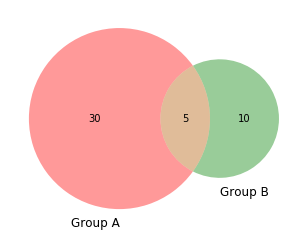

In [20]:
plt = venn2(subsets = (30, 10, 5), set_labels = ('Group A', 'Group B'))

In [41]:
overlap = len(df4[(df4['db_is_small_molecule_in_clinic'] == True) & (df4['ot_is_small_molecule_in_clinic'] == True)])
print(df8)

630


In [42]:
only_db = len(df4[(df4['db_is_small_molecule_in_clinic'] == True) & (df4['ot_is_small_molecule_in_clinic'] == False)])
print(only_db)

271


In [43]:
only_ot = len(df4[(df4['db_is_small_molecule_in_clinic'] == False) & (df4['ot_is_small_molecule_in_clinic'] == True)])
print(only_ot)

43


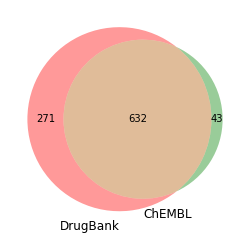

In [44]:
plt = venn2(subsets = (only_db, only_ot, overlap), set_labels = ('DrugBank', 'ChEMBL'))

In [45]:
only_db_df = df4[(df4['db_is_small_molecule_in_clinic'] == True) & (df4['ot_is_small_molecule_in_clinic'] == False)]
only_db_df.to_csv('targets-only-in-db-3Jan2021.csv')

In [46]:
only_ot_df = df4[(df4['db_is_small_molecule_in_clinic'] == False) & (df4['ot_is_small_molecule_in_clinic'] == True)]
only_ot_df.to_csv('targets-only-in-ot-3Jan2021.csv')